We will consider the prices between 0 and 1
We will consider amount of stocks between 0 and 1.
Reward at the terminal state will be calculaed.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets first consider the dynamics of the system, lets make this final it looks okay.

def getImpactPrice(price, amount):
    if amount < 0.1:
        p = max(price*(1-0.01*amount), 0)
    elif amount < 0.5:
        p = max(price*(1-0.1*amount*amount), 0)
    else:
        p = max(price*(1-0.2*amount*amount*amount), 0)
    return p

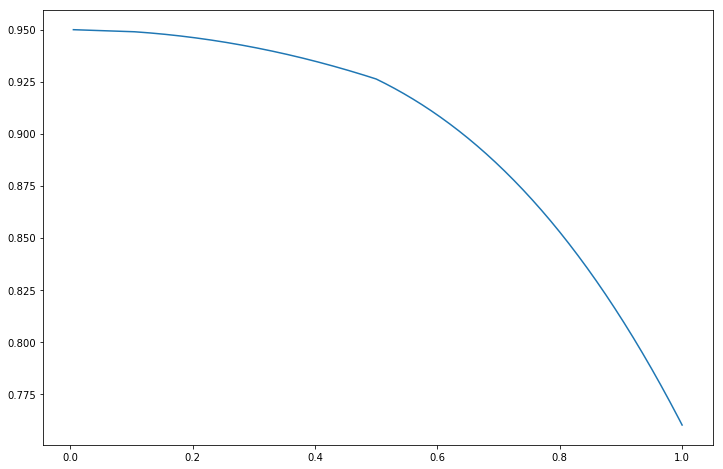

In [157]:
# this looks okay.
plt.figure(figsize=(12, 8))
plt.plot(amount, prices)

In [3]:
# to add the random component in the price
def addRandom(price):
    p = min(1, max(0, price + np.random.normal(0, 0.01)))
    return p

In [165]:
rp = [addRandom(p) for p in prices]

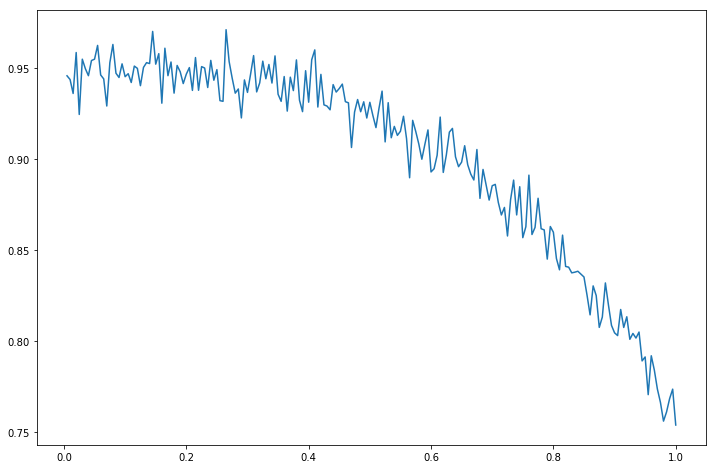

In [167]:
# this also looks okay
plt.figure(figsize=(12, 8))
plt.plot(amount, rp)

In [4]:
# lets implement the parametric form of policy function as logistic regression, 
# since we want to apply order in between (0,1)

def getAction(state, param):
    '''param is 3d parameter parameter vector and state is 3d vector of state, it returns the value of softmax 
    function/logistic regression based on state and param'''
    val = np.dot(param, state)
    return 1/(1+np.exp(val))


In [23]:
def getRewardState(state, action):
    '''it takes current state and action, returns next state and reward generated in this state'''
    newState = [0 for s in state]
    price = getImpactPrice(state[0], action)
    reward = price*min(action, state[1])
    newState[0] = addRandom(price)
    newState[1] = max(state[1] - state[1]*action, 0)
    newState[2] = state[2]
    
    return (reward, newState)

In [6]:
# lets define function to calculate the state value function based on parameters of it
def getStateValue(state, param):
    value = np.dot(state, param)
    return value

In [7]:
# function to get the terminal reward
def getTerminalReward(state):
    ''' This function will return terminal reward based on terminal state provide'''
    price = getImpactPrice(state[0], state[1])
    reward = price*state[1]
    return reward

In [31]:
# implenting actor critic method, lets see if it converges or not
# we will consider that we have set of parameters for each time index
T = 20
#parameter set for state value function

theta = [[np.random.random(), np.random.random(), np.random.random()] for i in range(T-1)]
#parameter set for policy function
nu = [[np.random.random(), np.random.random(), np.random.random()] for i in range(T-1)]

# let us take number of iterations as 10000 initially and then we will see later if it works
N = 100000

# learning rate for policy function as well as value function is put to be 0.001 initially
alpha_p = 0.001
alpha_v = 0.001

# as general rule of thumb is to put lambda value as 0.9 in TD(lambda) algo, I would put the same here
lambbda = 0.9

In [32]:
# now lets implement the actor critic method here and see if it works or not
while N > 0:
    # generate the initial state and start state = [price, stocks, 1]
    state = [np.random.random(), np.random.random(), 1]
    z = [0,0,0] #for eligibilty traces
    for t in range(T-1):
        # get the action to apply based on the policy we have till now
        action = getAction(state, nu[t])
        (reward, newState) = getRewardState(state, action)
        # based on above get the delta error value as below
        if t == T-2:
            delta = reward + getTerminalReward(newState) - getStateValue(state, theta[t])
        else:
            delta = reward + getStateValue(newState, theta[t+1]) - getStateValue(state, theta[t])
        #now update the set of parameters that is theta and nu
        z = np.add(np.multiply(lambbda, z), state)
        theta[t] = np.add(theta[t], np.multiply(alpha_v*delta, z))
        nu[t] = np.add(nu[t], np.multiply(alpha_p*delta*action*(1-action), state))
        state = newState
        t = t + 1
    N = N -1
print(theta)
print(nu)

[array([ 1.24973599,  0.73099924, -0.40059454]), array([ 0.94882011,  0.98634133, -0.33640674]), array([ 0.75567743,  1.1581409 , -0.29639878]), array([ 0.55041672,  1.27984393, -0.22522419]), array([ 0.38484968,  1.2645654 , -0.15105822]), array([ 0.25433496,  1.20710442, -0.08872623]), array([ 0.16820822,  1.10402103, -0.05086336]), array([ 0.1124218 ,  0.86827644, -0.03082524]), array([ 0.06975195,  0.8237235 , -0.01811128]), array([ 0.04153215,  0.71987951, -0.01117105]), array([ 0.02386606,  0.67170604, -0.00591482]), array([ 0.01296456,  0.73013185, -0.00327746]), array([ 0.01056379,  0.09710936, -0.00147757]), array([ 0.00680932,  0.0086143 , -0.00092384]), array([ 0.00350932,  0.28642062, -0.00056319]), array([ 0.00238279,  0.04956283, -0.00033142]), array([ 0.00139393,  0.04687331, -0.00019757]), array([  7.14608605e-04,   1.18026728e-01,  -1.08685567e-04]), array([  3.56707522e-04,   1.50118074e-02,  -5.19575376e-05])]
[array([ 1.07826478,  0.09163507,  0.15487971]), array([ 

In [33]:
# as per the above parameters let's check what is the output
def actionValue():
    u = [0 for i in range(20)]
    val = [0 for i in range(20)]
    prices = [0 for i in range(20)]
    T = 20
    #for i in range(1000):
    value = 0.0
    s_t = [np.random.random(), np.random.random(), 1]
    print(s_t)
    #print(s_t[1])
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            val[t] = getTerminalReward(s_t)
            u[t] = s_t[1]
        else:
            #u_t0 = np.random.normal(5,5)
            u[t] = getAction(s_t, nu[t])
            (reward, s) = getRewardState(s_t, u[t])
            val[t] = np.dot(s_t, theta[t])
        prices[t] = s_t[0]
        s_t = s
        t = t + 1
    return (val, u, prices)

In [27]:
# after 10000 iterations
(values, actions, prices) = actionValue()

[0.05623338399204414, 0.6820752585174961, 1]


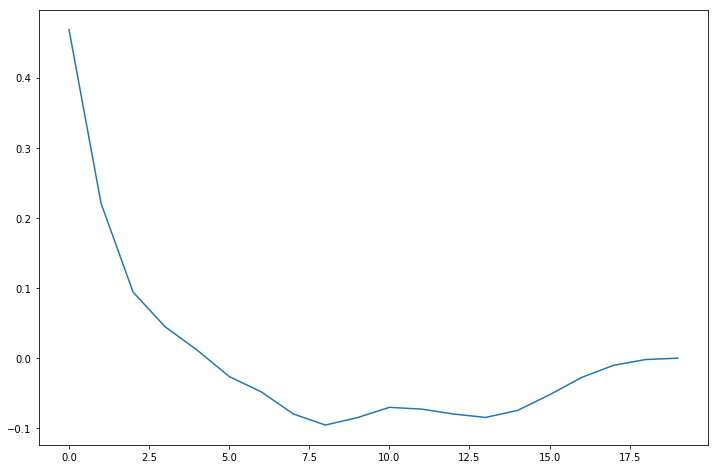

In [28]:
plt.figure(figsize=(12,8))
plt.plot(values)

[0.46383665455858303, 0.22508142926350455, 0.35919658167702423, 0.43878642520915256, 0.46918462097560543, 0.39593042187889754, 0.30106629787321565, 0.29544390475543836, 0.46874895285165141, 0.35035841556884484, 0.37152093889462035, 0.48116898491032262, 0.44240397469313675, 0.27184364260008587, 0.42719364801788412, 0.33770633480453066, 0.42777673079312872, 0.47147716801440787, 0.46631139529214388, 4.5022622703580449e-05]


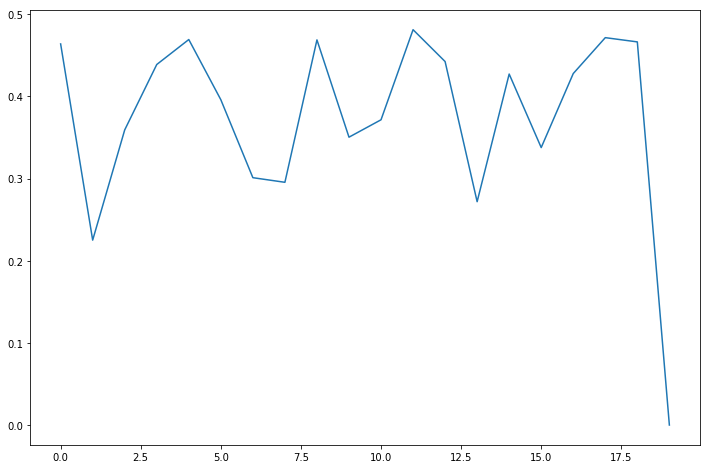

In [29]:
plt.figure(figsize=(12,8))
plt.plot(actions)
print(actions)

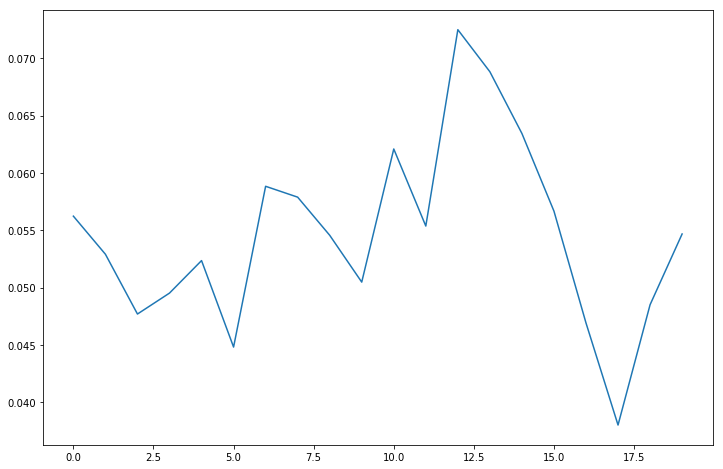

In [30]:
plt.figure(figsize=(12,8))
plt.plot(prices)

In [34]:
# after 100000 iterations
(values, actions, prices) = actionValue()

[0.8070709781722406, 0.828161743541886, 1]


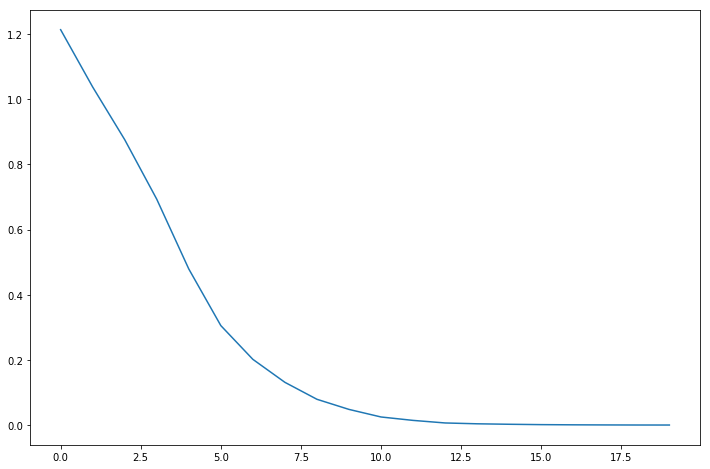

In [35]:
# value function with time
plt.figure(figsize=(12,8))
plt.plot(values)

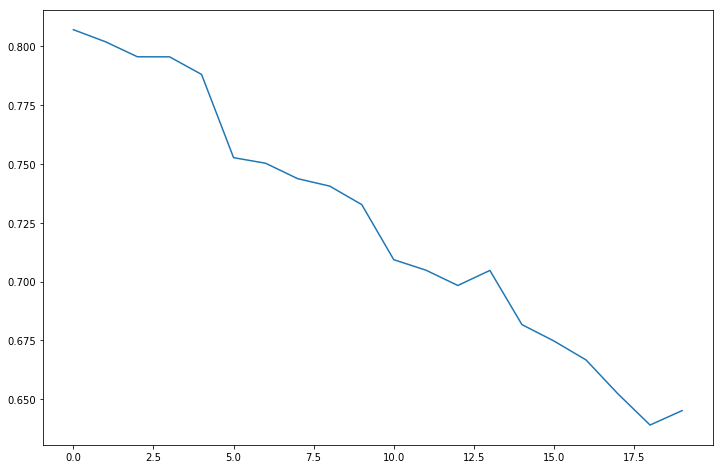

In [36]:
# prices with time
plt.figure(figsize=(12,8))
plt.plot(prices)

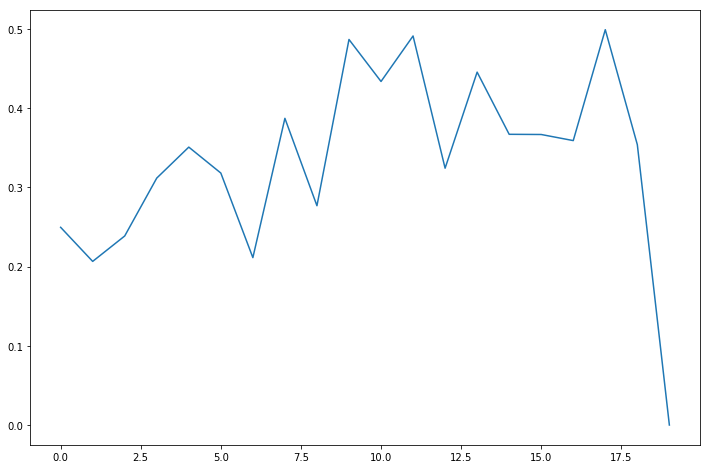

In [37]:
# actions with time
plt.figure(figsize=(12,8))
plt.plot(actions)

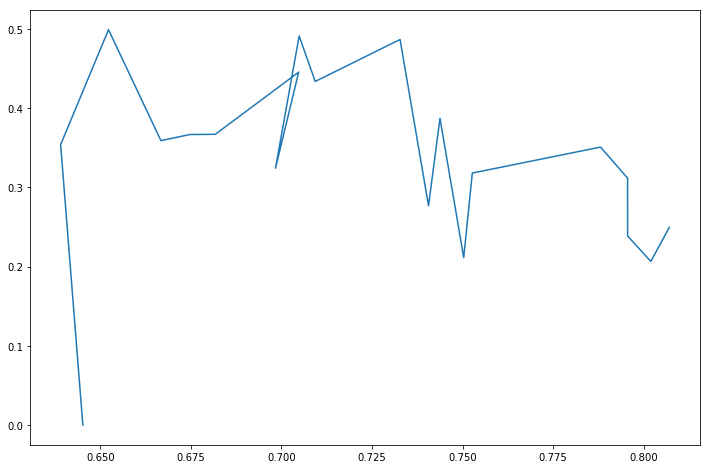

In [40]:
# prices vs action
plt.figure(figsize=(12,8))
plt.plot(prices, actions)